# Convolutional Neural Net and ResNet50V2 Modeling
In this notebook we create our first predictive model and evaluate our performance.

In [65]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.applications.resnet_v2 import ResNet50V2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Using Data Augmentation 

In [66]:
# All images will be rescaled by 1./255
gen = ImageDataGenerator(rescale=1./255,
                         rotation_range=40,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode='nearest',
                         validation_split=0.20)

In [67]:
train_generator = train_val_datagen.flow_from_directory('../images/incoming_images/',
                                                        subset='training',
                                                        class_mode='categorical',
                                                        batch_size=64,
                                                        target_size=(244, 244))

val_generator = train_val_datagen.flow_from_directory('../images/incoming_images/',
                                                       subset='validation',
                                                       class_mode='categorical',
                                                       batch_size=64,
                                                       target_size=(244, 244))

Found 837 images belonging to 8 classes.
Found 206 images belonging to 8 classes.


In [74]:
train_generator.num_classes

8

In [75]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(244,244,3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=36,
                              epochs=10,
                              validation_data=val_generator,
                              validation_steps=9,
                              verbose=1)

Epoch 1/10


/anaconda3/envs/deep-learning/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 6/36 [====>.........................] - ETA: 1:18 - loss: 2.2525 - acc: 0.1328

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/36 [==============================] - 94s 3s/step - loss: 2.0875 - acc: 0.1617 - val_loss: 2.0420 - val_acc: 0.1660
Epoch 2/10
36/36 [==============================] - 99s 3s/step - loss: 2.0378 - acc: 0.1647 - val_loss: 2.0488 - val_acc: 0.1975
Epoch 3/10
36/36 [==============================] - 96s 3s/step - loss: 2.0014 - acc: 0.2091 - val_loss: 2.0275 - val_acc: 0.1975
Epoch 4/10
36/36 [==============================] - 104s 3s/step - loss: 1.9824 - acc: 0.2257 - val_loss: 1.9957 - val_acc: 0.2290
Epoch 5/10
36/36 [==============================] - 93s 3s/step - loss: 1.9569 - acc: 0.2285 - val_loss: 2.0221 - val_acc: 0.1933
Epoch 6/10
36/36 [==============================] - 100s 3s/step - loss: 1.9378 - acc: 0.2464 - val_loss: 1.9308 - val_acc: 0.2794
Epoch 7/10
15/36 [===========>..................] - ETA: 48s - loss: 1.9259 - acc: 0.2708

In [23]:
model.save('./cnn_4.h5')

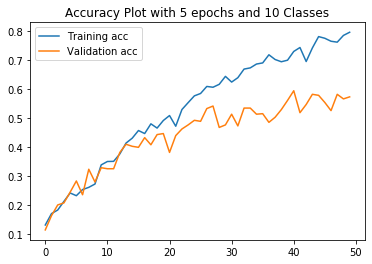

In [24]:
plt.plot(history.history['acc'], label = 'Training acc',)
plt.plot(history.history['val_acc'], label = 'Validation acc')
plt.title("Accuracy Plot with 5 epochs and 10 Classes")
plt.legend();


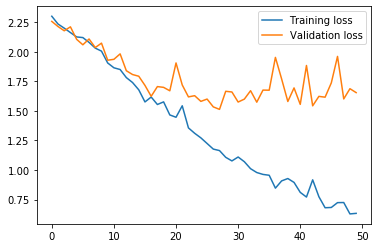

In [25]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend();

In [2]:
model = Sequential()

In [5]:
from tensorflow.keras.models import load_model

In [56]:
model = load_model('./cnn_4.h5')

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 121, 121, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 119, 119, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 57, 57, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 128)      

In [58]:
preds = model.predict_generator(val_generator)

In [59]:
y_true = val_generator.classes

In [60]:
y_preds = [np.argmax(pred) for pred in preds]

In [61]:
poses = os.listdir('../images/incoming_images/')

In [62]:
con_mat = confusion_matrix(y_true, y_preds)
con_mat

array([[ 1,  1,  3,  7,  2,  1,  0,  3,  2,  7],
       [ 3,  0,  3,  2,  3,  0,  0,  2,  2,  3],
       [ 5,  0,  6,  5,  7,  1,  1,  2,  1,  6],
       [ 6,  0,  2, 10,  3,  2,  3,  0,  3,  5],
       [ 3,  1,  4,  3,  1,  0,  1,  2,  0,  4],
       [ 2,  1,  4,  5,  0,  0,  2,  2,  0,  1],
       [ 4,  2,  2,  3,  0,  0,  3,  1,  1,  3],
       [ 2,  1,  4,  1,  1,  2,  0,  1,  3,  3],
       [ 7,  0,  5,  3,  1,  3,  2,  1,  3,  5],
       [ 8,  0,  7,  3,  3,  3,  3,  0,  4,  5]])

In [63]:
import seaborn as sns

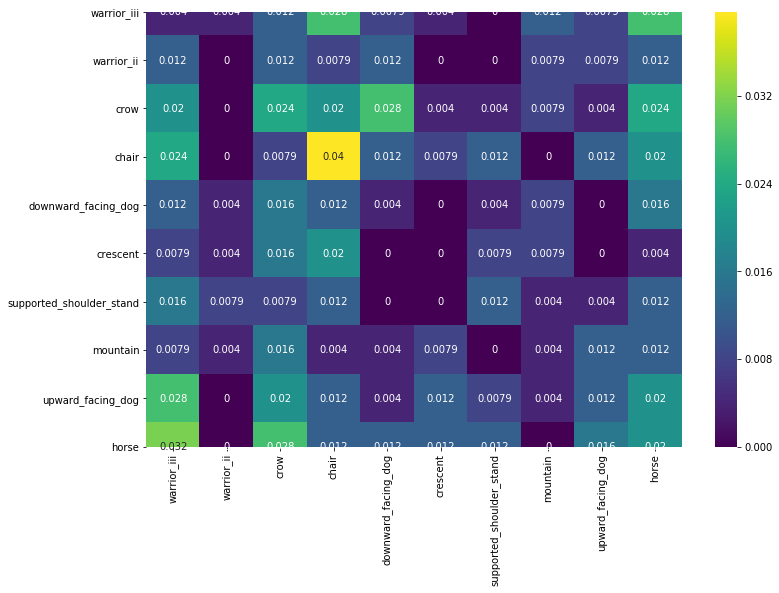

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(con_mat/252,xticklabels=poses, yticklabels=poses, annot=True, cmap='viridis');

In [1]:
from tensorflow.keras.models import load_model

In [2]:
model = load_model('../models/cnn_5_classes_10_epoch_augmented_v3.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
from PIL import Image
im = Image.

TypeError: 'module' object is not callable

In [3]:

model.predict()

AttributeError: 'str' object has no attribute 'shape'